# Capstone Project Flask UI

Pada capstone ini anda diminta untuk membangun sebuah Flask UI sederhana yang berisi beberapa tampilan plot dari skeleton yang sudah disediakan dan satu plot tambahan berdasarkan analisis anda.

File ini dapat dimanfaatkan untuk membantu anda dalam proses wrangling dan visualization. Apabila proses wrangling sudah tepat dan hasil visualisasi sudah sesuai dengan ketentuan, anda dapat memindahkan kembali kode program yang sudah anda lengkapi ke dalam file `app.py`.

## Data Preprocessing

**Import library**

In [20]:
from flask import Flask, render_template
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import BytesIO
import base64

**Load data**

Bacalah file `googleplaystore.csv` data dan simpan ke objek dataframe dengan nama playstore

In [21]:
playstore = pd.read_csv("data/googleplaystore.csv")
playstore

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


**Data Cleansing** 

**_Task 1:_** Hapus data yang duplikat berdasarkan kolom App, dengan tetap keep data pertama (hint : gunakan parameter subset)

In [22]:
playstore.drop_duplicates(subset = "App", keep = "first")

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


Bagian ini untuk menghapus row 10472 karena nilai data tersebut tidak tersimpan pada kolom yang benar

In [23]:
playstore.drop([10472], inplace=True)

**_Task 2:_** Cek tipe data kolom Category. Jika masih tersimpan dengan format tipe data yang salah, ubah ke tipe data yang sesuai


In [24]:
# playstore.dtypes
playstore.Category = playstore["Category"].astype("category")
playstore.dtypes

App                 object
Category          category
Rating             float64
Reviews             object
Size                object
Installs            object
Type                object
Price               object
Content Rating      object
Genres              object
Last Updated        object
Current Ver         object
Android Ver         object
dtype: object

**_Task 3:_** Pada kolom Installs Buang tanda koma(,) dan tanda tambah(+) kemudian ubah tipe data menjadi integer

In [25]:
playstore.Installs = playstore.Installs.apply(lambda x: x.replace(",", ""))
playstore.Installs = playstore["Installs"].apply(lambda x: x.replace("+", ""))
playstore["Installs"] = playstore["Installs"].astype("int64")
playstore.dtypes

App                 object
Category          category
Rating             float64
Reviews             object
Size                object
Installs             int64
Type                object
Price               object
Content Rating      object
Genres              object
Last Updated        object
Current Ver         object
Android Ver         object
dtype: object

Bagian ini untuk merapikan kolom Size, Anda tidak perlu mengubah apapun di bagian ini

In [26]:
playstore['Size'].replace('Varies with device', np.nan, inplace = True ) 
playstore.Size = (playstore.Size.str.replace(r'[kM]+$', '', regex=True).astype(float) * \
             playstore.Size.str.extract(r'[\d\.]+([kM]+)', expand=False)
            .fillna(1)
            .replace(['k','M'], [10**3, 10**6]).astype(int))
playstore['Size'].fillna(playstore.groupby('Category')['Size'].transform('mean'),inplace = True)
playstore


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,"19,000,000.0",10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,"14,000,000.0",500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,"8,700,000.0",5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,"25,000,000.0",50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,"2,800,000.0",100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,"53,000,000.0",5000,Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,"3,600,000.0",100,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,"9,500,000.0",1000,Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,"13,310,822.3",1000,Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


**_Task 4:_** Pada kolom Price, buang karakater $ pada nilai Price lalu ubah tipe datanya menjadi float

In [27]:
playstore["Price"] = playstore["Price"].apply(lambda x: x.replace("$", ""))
playstore["Price"] = playstore["Price"].astype("float64")
playstore.dtypes

App                 object
Category          category
Rating             float64
Reviews             object
Size               float64
Installs             int64
Type                object
Price              float64
Content Rating      object
Genres              object
Last Updated        object
Current Ver         object
Android Ver         object
dtype: object

Ubah tipe data Reviews, Size, Installs ke dalam tipe data integer

In [28]:
playstore

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,"19,000,000.0",10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,"14,000,000.0",500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,"8,700,000.0",5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,"25,000,000.0",50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,"2,800,000.0",100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,"53,000,000.0",5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,"3,600,000.0",100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,"9,500,000.0",1000,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,"13,310,822.3",1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [29]:
##code here
playstore["Reviews"] = playstore["Reviews"].astype("int64")
playstore["Size"] = playstore["Size"].astype("int64")

playstore.dtypes
playstore

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000000,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600000,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9500000,1000,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,13310822,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


## Data Wrangling

In [30]:
df2 = playstore.copy()

df2_new = df2.drop_duplicates(subset = "App", keep = "first")
df2_new

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000000,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600000,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9500000,1000,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,13310822,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


**_Task 5:_** Dataframe top_category dibuat untuk menyimpan frekuensi aplikasi untuk setiap Category. 
Gunakan crosstab untuk menghitung frekuensi aplikasi di setiap category kemudian gunakan `Jumlah`
sebagai nama kolom dan urutkan nilai frekuensi dari nilai yang paling banyak. Terakhir reset index dari dataframe top_category.

In [31]:
top_category = pd.crosstab(index = df2_new["Category"],
                           columns = "Jumlah",
                           values = df2_new["Installs"],
                           aggfunc = "count").sort_values(by = "Jumlah", ascending = False)
top_category.reset_index().head()

col_0,Category,Jumlah
0,FAMILY,1832
1,GAME,959
2,TOOLS,827
3,BUSINESS,420
4,MEDICAL,395


In [32]:
top_category.head()

col_0,Jumlah
Category,
FAMILY,1832
GAME,959
TOOLS,827
BUSINESS,420
MEDICAL,395


**_Task 6:_** Ini adalah bagian untuk melengkapi konten value box 
most category mengambil nama category paling banyak mengacu pada dataframe `top_category`
total mengambil frekuensi/jumlah category paling banyak mengacu pada dataframe `top_category`

In [33]:
top_category_idx_new = top_category.reset_index()
most_categories = top_category_idx_new[["Category"]]
total = top_category_idx_new[["Jumlah"]]

FAMILY
1832


In [63]:
most_categories.head()

col_0,Category
0,FAMILY
1,GAME
2,TOOLS
3,BUSINESS
4,MEDICAL


In [68]:
most_categories.loc[0,"Category"]

'FAMILY'

In [67]:
total.head()

col_0,Jumlah
0,1832
1,959
2,827
3,420
4,395


In [69]:
total.loc[0, "Jumlah"]

1832

`rev_table` adalah tabel yang berisi 10 aplikasi yang paling banyak direview oleh pengguna.
Silahkan melakukan agregasi data yang tepat menggunakan `groupby` untuk menampilkan 10 aplikasi yang diurutkan berdasarkan jumlah Review pengguna. 

Tabel yang ditampilkan terdiri dari 4 kolom yaitu nama Category, nama App, total Reviews, dan rata-rata Rating.
Pindahkan kode wrangling yang disimpan dalam variable `rev_table` pada `blank code` yang telah di chaining dengan kode `.to_html`.

In [34]:
# rev_table.dtypes

In [35]:
# rev_table

In [58]:
# rev_table["Reviews"] = rev_table["Reviews"].apply(lambda x: x.replace(",", ""))
rev_table = df2_new[["Category", "App", "Reviews", "Rating"]].groupby(["Category","App"]).mean().sort_values(by = "Reviews", ascending = False).reset_index().head(10)
pd.set_option("display.float_format", '{:,.1f}'.format)
rev_table

# rev_table.head(10)
# rev_table

,Category,App,Reviews,Rating
0,SOCIAL,Facebook,"78,158,306.0",4.1
1,COMMUNICATION,WhatsApp Messenger,"69,119,316.0",4.4
2,SOCIAL,Instagram,"66,577,313.0",4.5
3,COMMUNICATION,Messenger – Text and Video Chat for Free,"56,642,847.0",4.0
4,GAME,Clash of Clans,"44,891,723.0",4.6
5,TOOLS,Clean Master- Space Cleaner & Antivirus,"42,916,526.0",4.7
6,GAME,Subway Surfers,"27,722,264.0",4.5
7,VIDEO_PLAYERS,YouTube,"25,655,305.0",4.3
8,TOOLS,"Security Master - Antivirus, VPN, AppLock, Boo...","24,900,999.0",4.7
9,GAME,Clash Royale,"23,133,508.0",4.6


Apabila menuliskan kode program yang tepat maka hasil wrangling adalah sebagai berikut :

In [37]:
# rev_table

In [38]:
# df2

## Data Visualization

**Membuat Bar Plot**

**_Task 7:_** 
Lengkapi tahap agregasi untuk membuat dataframe yang mengelompokkan aplikasi berdasarkan Category.
Buatlah bar plot dimana axis x adalah nama Category dan axis y adalah jumlah aplikasi pada setiap kategori, kemudian urutkan dari jumlah terbanyak

In [43]:
cat_order = df2.groupby("Category").agg({
"Installs" : "size"
 }).rename({'Category':'Total'}, axis=1).sort_values(by = "Installs", ascending = False).head()
cat_order

,Installs
Category,
FAMILY,1972
GAME,1144
TOOLS,843
MEDICAL,463
BUSINESS,460


C:\Users\Clara Sinta\AppData\Local\Temp\ipykernel_10784\2190944959.py:11: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.barh(X, Y, color=my_colors)


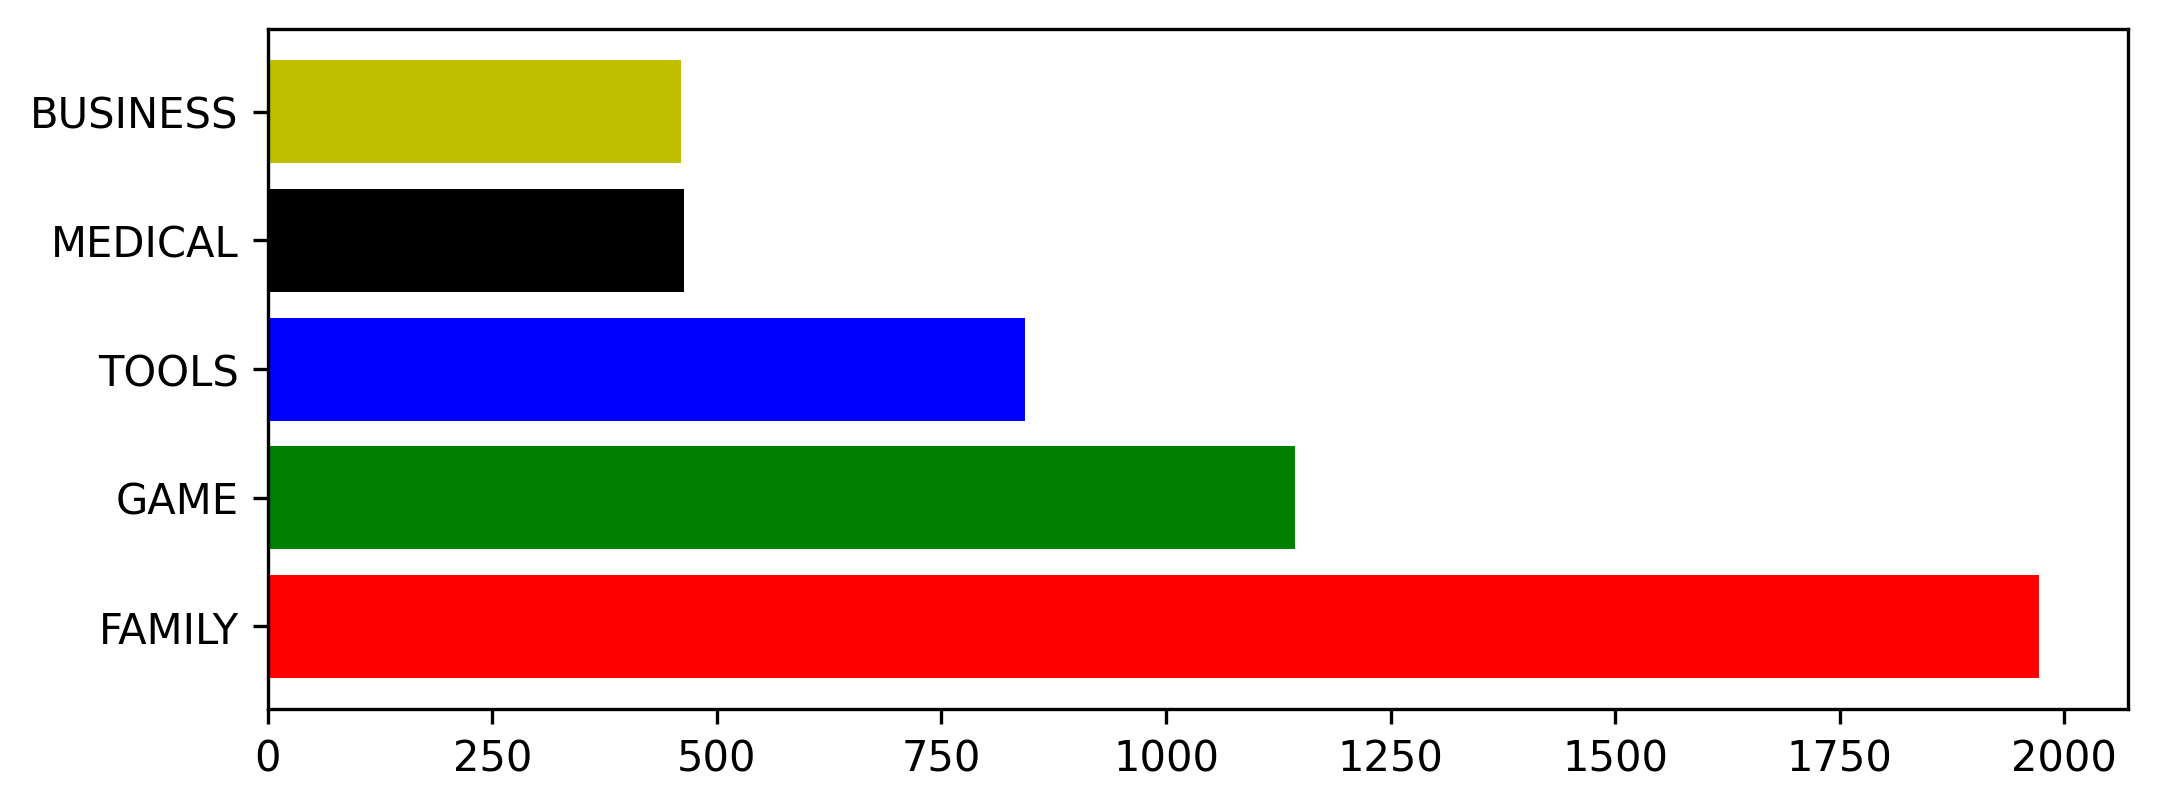

In [73]:
cat_order = df2.groupby("Category").agg({
    "Installs" : "count"
 }).rename({'Category':'Total'}, axis=1).sort_values(by = "Installs", ascending = False).head()
X = cat_order.index
Y = cat_order.Installs
my_colors = 'rgbkymc'
# bagian ini digunakan untuk membuat kanvas/figure
fig = plt.figure(figsize=(8,3),dpi=300)
fig.add_subplot()
# bagian ini digunakan untuk membuat bar plot
plt.barh(X, Y, color=my_colors)
# bagian ini digunakan untuk menyimpan plot dalam format image.png
plt.savefig('cat_order.png',bbox_inches="tight") 

<ipython-input-18-2e3b6f171ed0>:10: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.barh(X,Y, color=my_colors)


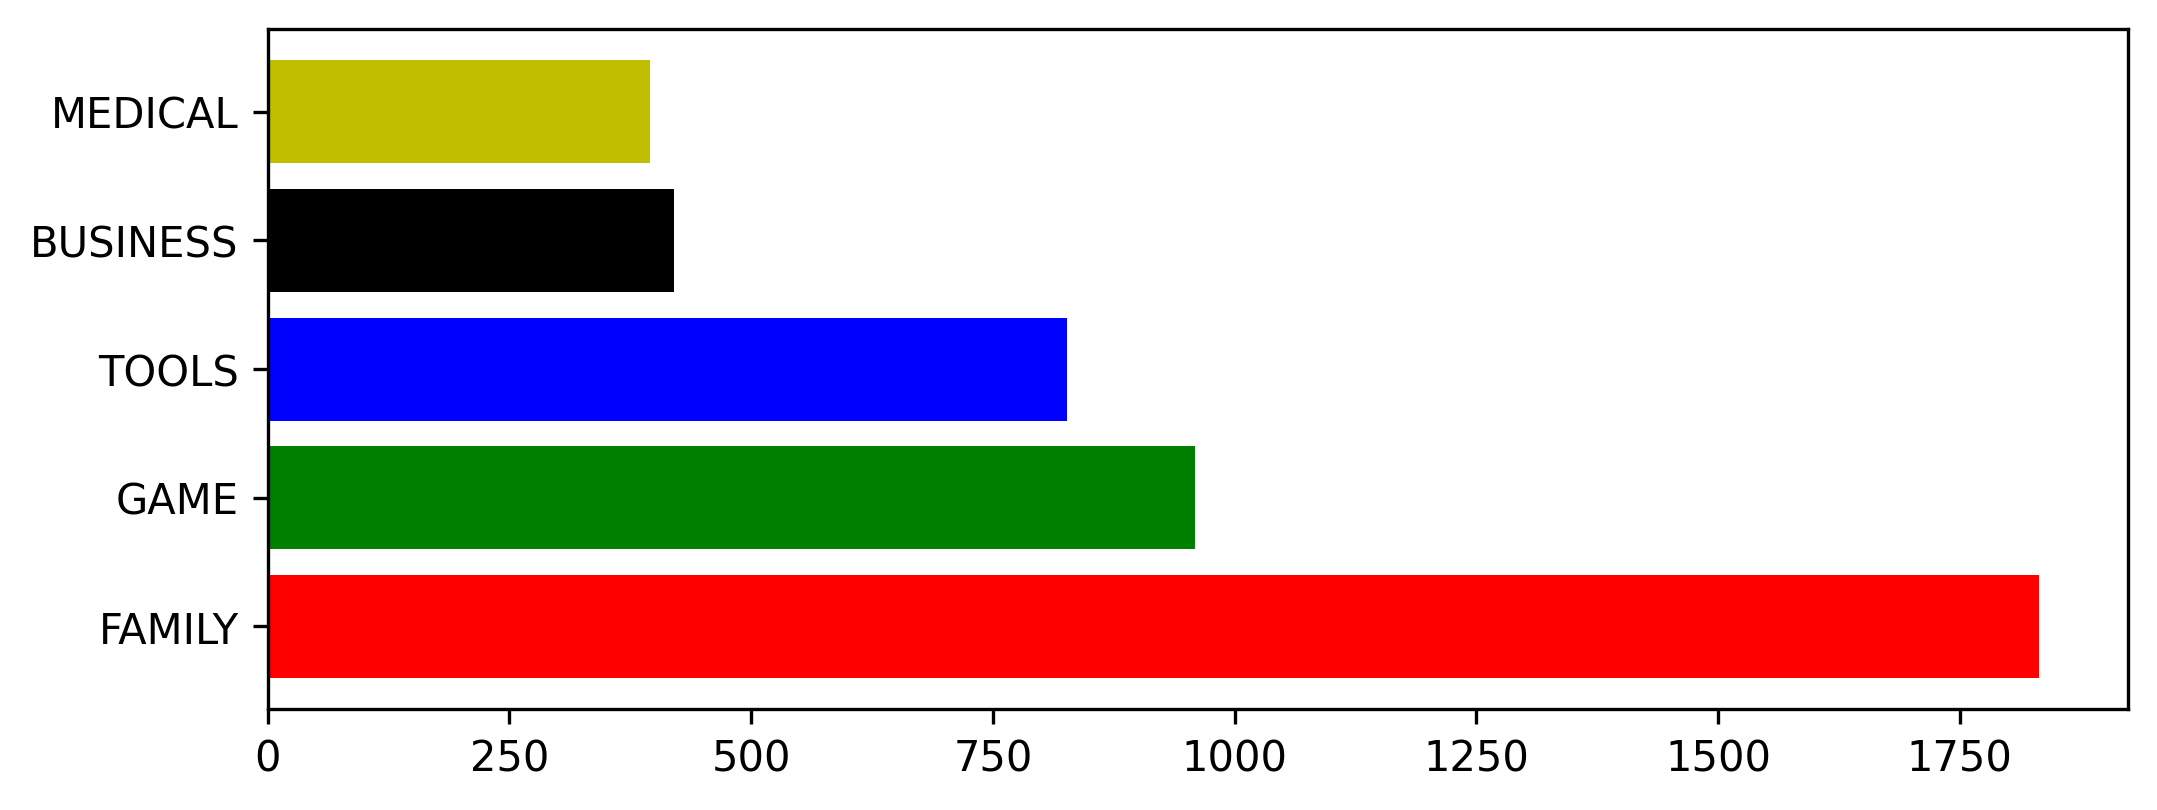

In [18]:
cat_order = df2.groupby(_______).agg({
_________ : _________
 }).rename({'Category':'Total'}, axis=1).sort_values(__________).head()
X = _____________
Y = _____________
my_colors = 'rgbkymc'
# bagian ini digunakan untuk membuat kanvas/figure
fig = plt.figure(figsize=(8,3),dpi=300)
fig.add_subplot()
# bagian ini digunakan untuk membuat bar plot
plt.barh(____,_____, color=my_colors)
# bagian ini digunakan untuk menyimpan plot dalam format image.png
plt.savefig('cat_order.png',bbox_inches="tight") 

**Membuat Scatter Plot**

**_Task 8:_** Buatlah scatter plot untuk menampilkan hubungan dan persebaran apalikasi dilihat dari Review vs Rating.
Ukuran scatter menggambarkan berapa banyak pengguna yang telah menginstall aplikasi 
    

In [55]:
area = playstore[["Installs"]].values/10000000
area

array([[1.e-03],
       [5.e-02],
       [5.e-01],
       ...,
       [1.e-04],
       [1.e-04],
       [1.e+00]])

In [44]:
df2

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000000,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600000,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9500000,1000,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,13310822,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


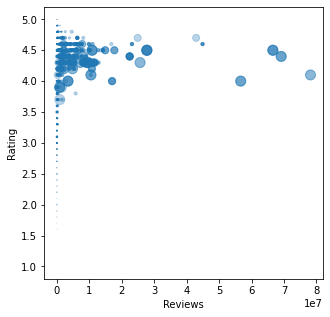

In [138]:
X = df2["Reviews"].values # axis x
Y = df2["Rating"].values # axis y
area = playstore["Installs"].astype("int64").values/10000000 # ukuran besar/kecilnya lingkaran scatter plot
fig = plt.figure(figsize=(5,5))
fig.add_subplot()
# isi nama method untuk scatter plot, variabel x, dan variabel y
plt.scatter(x=X,y=Y, s=area, alpha=0.3)
plt.xlabel('Reviews')
plt.ylabel('Rating')
plt.savefig('rev_rat.png',bbox_inches="tight")

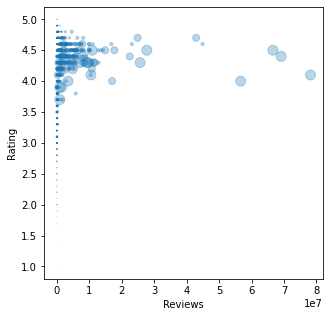

In [19]:
X = df2["Reviews"].values # axis x
Y = df2["Ratings"].values # axis y
area = playstore["Installs"].astype("int64").values/10000000 # ukuran besar/kecilnya lingkaran scatter plot
fig = plt.figure(figsize=(5,5))
fig.add_subplot()
# isi nama method untuk scatter plot, variabel x, dan variabel y
plt.scatter(x=X,y=Y, s=area, alpha=0.3)
plt.xlabel('Reviews')
plt.ylabel('Rating')
plt.savefig('rev_rat.png',bbox_inches="tight")

**Membuat Histogram Size Distribution**

**_Task 9:_** Buatlah sebuah histogram yang menggambarkan distribusi Size aplikasi dalam satuan Mb(Megabytes). Histogram yang terbentuk terbagi menjadi 100 bins

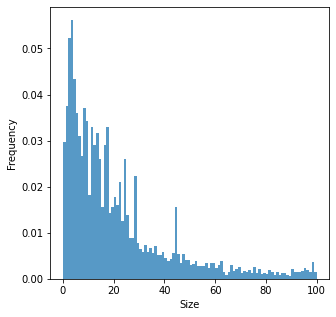

In [139]:
X=(playstore["Size"]/1000000).values
fig = plt.figure(figsize=(5,5))
fig.add_subplot()
plt.hist(X, bins=100, density=True,  alpha=0.75)
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.savefig('hist_size.png',bbox_inches="tight")

Text(0, 0.5, 'Frequency')

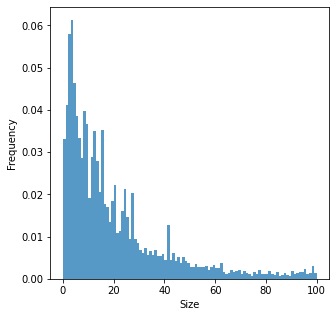

In [20]:
X=(___________/1000000).values
fig = plt.figure(figsize=(5,5))
fig.add_subplot()
plt._______(_____,bins=100, density=True,  alpha=0.75)
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.savefig('hist_size.png',bbox_inches="tight")

**_Task 10:_** Buatlah plot berdasarkan hasil analisis anda. Plot yang dibuat tidak diperbolehkan sama dengan plot yang sudah dicontohkan.

In [176]:
games
games.groupby(["Genres", "App"]).max().sort_values(by = "Rating", ascending = False)

C:\Users\Clara Sinta\AppData\Local\Temp\ipykernel_8352\2415618484.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  games.groupby(["Genres", "App"]).max().sort_values(by = "Rating", ascending = False)


Rating  Reviews      Size  \
Genres App                                                                 
Arcade Axe Champs! Wars                           5.0        8  25000000   
       Mad Dash Fo' Cash                          5.0       14  16000000   
Action Santa's Monster Shootout DX                5.0        4  33000000   
Racing Monster Ride Pro                           5.0        1  24000000   
Arcade Ra Ga Ba                                   5.0        2  20000000   
...                                               ...      ...       ...   
Trivia Bu Nedir ?                                 NaN        0  33000000   
       Countries of the European Union (Quiz)     NaN       11   7000000   
       Guess the song of J Balvin                 NaN       28   8900000   
       Nedir Bu ?                                 NaN        0  33000000   
Word   Bu Hangi Oyun ?                            NaN        2  26000000   

                                               Installs  Type  Price  \
Genres App                                                             
Arcade Axe Champs! Wars                              50  Free    0.0   
       Mad Dash Fo' Cash                            100  Free    0.0   
Action Santa's Monster Shootout DX                   50  Paid    2.0   
Racing Monster Ride Pro                              10  Free    0.0   
Arcade Ra Ga Ba                                       1  Paid    1.5   
...                                                 ...   ...    ...   
Trivia Bu Nedir ?                                    50  Free    0.0   
       Countries of the European Union (Quiz)       100  Free    0.0   
       Guess the song of J Balvin                  1000  Free    0.0   
       Nedir Bu ?                                    10  Free    0.0   
Word   Bu Hangi Oyun ?                               50  Free    0.0   

                                              Content Rating  \
Genres App                                                     
Arcade Axe Champs! Wars                             Everyone   
       Mad Dash Fo' Cash                            Everyone   
Action Santa's Monster Shootout DX                      Teen   
Racing Monster Ride Pro                             Everyone   
Arcade Ra Ga Ba                                     Everyone   
...                                                      ...   
Trivia Bu Nedir ?                                   Everyone   
       Countries of the European Union (Quiz)       Everyone   
       Guess the song of J Balvin                   Everyone   
       Nedir Bu ?                                   Everyone   
Word   Bu Hangi Oyun ?                              Everyone   

                                                    Last Updated Current Ver  \
Genres App                                                                     
Arcade Axe Champs! Wars                            June 26, 2018         1.1   
       Mad Dash Fo' Cash                           June 19, 2017        2.5a   
Action Santa's Monster Shootout DX               August 15, 2013        1.05   
Racing Monster Ride Pro                            March 5, 2018         2.0   
Arcade Ra Ga Ba                                 February 8, 2017       1.0.4   
...                                                          ...         ...   
Trivia Bu Nedir ?                                 April 15, 2018      3.1.6z   
       Countries of the European Union (Quiz)   February 3, 2018         1.3   
       Guess the song of J Balvin              December 24, 2017         1.1   
       Nedir Bu ?                                 March 18, 2018      3.1.6z   
Word   Bu Hangi Oyun ?                            March 11, 2018      3.1.6z   

                                                Android Ver  
Genres App                                                   
Arcade Axe Champs! Wars                          4.1 and up  
       Mad Dash Fo' Cash                         4.1 and up  

In [211]:
top_10_genres = pd.pivot_table(data = games,
                              index = "Genres",
                              values = "App",
                              aggfunc = "count").sort_values(by = "App", ascending = False).head(10)

top_10_genres

,App
Genres,
Action,299
Arcade,185
Racing,91
Adventure,73
Card,47
Board,42
Casino,39
Trivia,38
Puzzle,24


In [215]:
top_10

,Genres,App,Rating
391,Arcade,Axe Champs! Wars,5.0
478,Arcade,Mad Dash Fo' Cash,5.0
232,Action,Santa's Monster Shootout DX,5.0
813,Racing,Monster Ride Pro,5.0
502,Arcade,Ra Ga Ba,5.0
...,...,...,...
908,Trivia,Bu Nedir ?,NaN
910,Trivia,Countries of the European Union (Quiz),NaN
913,Trivia,Guess the song of J Balvin,NaN
916,Trivia,Nedir Bu ?,NaN


In [225]:
games = playstore[playstore["Category"] == "GAME"]
games = games.drop_duplicates(subset = "App", keep = "last")
# games.sort_values(by = "Installs", ascending = False)

top_10 = games.groupby(["Genres", "App"])[["Rating"]].max().sort_values(by = "Rating", ascending = False)#.head(10)
top_10.head(10)#.groupby(["Genres", "App"]).max()#.reset_index()
# top_10
# pd.pivot_table(data = top_10,
#               index = "Genres",
# #               columns = "App",
#               values = "App",
#               aggfunc = "max")

Rating
Genres App                                
Arcade Axe Champs! Wars                5.0
       Mad Dash Fo' Cash               5.0
Action Santa's Monster Shootout DX     5.0
Racing Monster Ride Pro                5.0
Arcade Ra Ga Ba                        5.0
Trivia CP Trivia                       5.0
Arcade Brick Breaker BR                5.0
       Trovami se ci riesci            5.0
Racing EC Mover                        5.0
Arcade 211:CK                          5.0

In [70]:
## code here

games = playstore[playstore["Category"] == "GAME"]
games = games.drop_duplicates(subset = "App", keep = "last")

top_10_genres = pd.pivot_table(data = games,
                              index = "Genres",
                              values = "App",
                              aggfunc = "count").sort_values(by = "App", ascending = False).head(10)

top_10 = games.groupby(["Genres", "App"])[["Rating"]].max().sort_values(by = "Rating", ascending = False)
top_10_games_by_genres = top_10.reset_index().sort_values(['Rating','Genres','App'], ascending=False)
top_10_games_by_genres.groupby("Genres").head(1).sort_values("Genres", ascending = True).set_index("Genres").reindex(top_10_genres.index).reset_index()

,Genres,App,Rating
0,Action,Santa's Monster Shootout DX,5.0
1,Arcade,Trovami se ci riesci,5.0
2,Racing,Monster Ride Pro,5.0
3,Adventure,An Elite Warrior Ex,4.7
4,Card,Solitaire: Decked Out Ad Free,4.9
5,Board,CT-ART 4.0 (Chess Tactics 1200-2400 ELO),4.8
6,Casino,Rock N' Cash Casino Slots -Free Vegas Slot Games,4.7
7,Trivia,CP Trivia,5.0
8,Puzzle,The Room: Old Sins,4.9
9,Word,Word Hunt,4.9
